# IMDB Data Cleaning and Exploration

In this project, we will be analyze a subset of the imdb movies database which consists of the top 10k movies. We will utilize the data file `imdb_top_10000.txt` 

First step: Load the file using pandas. The columns represent `['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres']`. 

In [2]:
#solve here
import pandas as pd

#load the txt file, found that it is tab-separated; rename columns
data = pd.read_csv('imdb_top_10000.txt', sep="\t", header=None)
data.columns = ['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres']
#data

In [3]:
# display the top 7 elements of the table
data.head(7)

,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller
5,tt0109830,Forrest Gump (1994),1994,8.7,368994,142 mins.,Comedy|Drama|Romance
6,tt0169547,American Beauty (1999),1999,8.6,338332,122 mins.,Drama


In [4]:
#display the bottom 7 elements of the table
data.tail(7)

,imdbID,title,year,score,votes,runtime,genres
9993,tt0218581,Scarlet Diva (2000),2000,5.2,1358,91 mins.,Drama
9994,tt0118635,Aprile (1998),1998,6.7,1358,78 mins.,Comedy
9995,tt0807721,Meduzot (2007),2007,7.0,1357,78 mins.,Drama
9996,tt0339642,Daltry Calhoun (2005),2005,5.2,1357,100 mins.,Comedy|Drama|Music|Romance
9997,tt0060880,The Quiller Memorandum (1966),1966,6.5,1356,104 mins.,Drama|Mystery|Thriller
9998,tt0152836,Taal (1999),1999,6.5,1356,179 mins.,Musical|Romance
9999,tt0279977,The Navigators (2001),2001,6.9,1356,96 mins.,Comedy|Drama


## Finding null values and removing the rows that contains the nulls

In [5]:
# Solve here
import numpy as np

data.isnull().sum() # there is 1 NaN in 'genre'
np.where(data.isnull()) # location of the Nan: [7917, 6]
data.loc[7917, :] # display the info in the row of the Nan value

imdbID            tt0990404
title      Chop Shop (2007)
year                   2007
score                   7.2
votes                  2104
runtime            84 mins.
genres                  NaN
Name: 7917, dtype: object

######################

The column called runtime contains the duration of the movie with the word mins next to it (such as 142 mins). We need to have the duration as just numbers without the word mins so we can do some statistical analysis on the movies durations. 

In [6]:
# Replace the 'runtime' column with the # value only (aka removing 'mins')
# without adding a new column for duration.

data["runtime"] = data["runtime"].str.split(" ", n = 1, expand = True) 
# separate at whitespace, max 1 split, expand = True makes it a dataframe return 

data["runtime"] #print (optional)

0       142
1       154
2       139
3       136
4       148
       ... 
9995     78
9996    100
9997    104
9998    179
9999     96
Name: runtime, Length: 10000, dtype: object

#########################

What is min, max, average and variance of the durations and which movies have the longest durations?

In [7]:
# but first...my data was being weird so i wanted to make sure it was a Data Frame. 
data = pd.DataFrame(data)

data['runtime'] = data['runtime'].astype(int)
# was sorting and reading the data incorrectly - figured out because the column was still strings
# gave me a max of 99 so i knew something was off!

In [8]:
# minimum
minimum = data['runtime'].min()
print("The minimum runtime is ", minimum, " minutes.")

#maximum
maximum= data['runtime'].max()
print("The maximum runtime is ", maximum, " minutes.")

#variance
print("The variance of the runtimes is", data.loc[:,"runtime"].var())

# movies with longest durations
np.where(data['runtime']==maximum) # returns 6908
longest_movie = data.loc[6908, :]
print("The movie with the longest duration is ", longest_movie["title"], ".")

The minimum runtime is  0  minutes.
The maximum runtime is  450  minutes.
The variance of the runtimes is 709.0875621962832
The movie with the longest duration is  Satantango (1994) .


##########################

What are the years provided in the given file?

In [11]:
# Will use unique and sort the outcome

#need an array to use unique
a = np.array(data['year'])
a2 = np.unique(a)

print("Please see the array below for the years present in the given file.")
a2

Please see the array below for the years present in the given file.


array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011], dtype=int64)

############################

Are there any duplicates in the data?

In [12]:
np.where(data.duplicated() == True)

# also used np.where(data.duplicated() == False) to double check that these would work together

print("There are no duplicates in the data.")

There are no duplicates in the data.


###############################

Calculate the number of movies produced each year then plot number of movies vs years. What is the year that has the highest movies?

Calculate this with the code and verify it with the graph.

In [13]:
year_counts = data.year.value_counts()
# year_counts # print (optional)

# i also summed these to verify they add to 10000 movies.
# data.year.value_counts().sum()

year_counts.head()

# According to our code (result below), 2006 has the highest movies.

2006    502
2007    496
2008    481
2005    439
2004    430
Name: year, dtype: int64

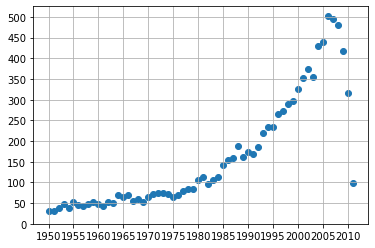

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(year_counts.index, year_counts.values)
# a scatter plot is the only type of plot that wasn't severely messed up when I tried it
plt.yticks(np.arange(0, 510, 50))
plt.xticks(np.arange(1950, 2011, 5))
plt.grid()


# The graph agrees with the code in that 2006 has the highest number of movies produced.

# used the internet to find the syntax of adjusting the x and y ticks: min, max, step
# https://stackoverflow.com/questions/27456185/scaling-axis-for-a-scatter-plot-in-matlibplot-in-python